In [1]:
# %pip install shap
# %pip install dash
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import shap
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls                             
import plotly as plot
from collections import Counter                 
import plotly.figure_factory as ff
import plotly.express as px

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [2]:
Individuos = pd.read_csv('C:/Users/jlope/Documents/IPCM_2021/IPCM-2021/Modelos/Inputs/BDIndividuosTotal.csv',decimal=',')
Individuos

C:\Users\jlope\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (2,3,4,82,105,106,107,108,109,110,111,112,119,120,121,134,169) have mixed types.Specify dtype option on import or set low_memory=False.



,Edicion,S_1,S_2,I_92,I_93,I_6,I_7,I_8,I_9,I_10,...,I_91_8,I_91_9,I_91_10,CodZona,Zona,Condiciones Territoriales,Prácticas,Efectos,IPCM,I_18_14
0,2019,1,La 1001011\tLA AVANZADA,1\tPOPULAR,NaN,Femenino,1985.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,...,No,No,No,1.0,Nororiental,0.361795,0.387014,0.444633,0.40,NaN
1,2019,1,NaN,1\tPOPULAR,NaN,Masculino,1953.0,Sin pertenencia étnica,Ninguno,Básica Primaria,...,No,No,Si,1.0,Nororiental,0.327151,0.461779,0.238168,0.33,NaN
2,2019,1,Chispero,NaN,NaN,Femenino,1970.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,...,Si,No,No,1.0,Nororiental,0.299800,0.372017,0.673632,0.42,NaN
3,2019,1,Ca,1\tPOPULAR,NaN,Femenino,1989.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,...,Si,No,No,1.0,Nororiental,0.558784,0.633542,0.323003,0.49,NaN
4,2019,1,1001001\tSANTO DOMINGO SABIO Nº,1\tPOPULAR,NaN,Femenino,1953.0,Mestizo,Ninguno,Ninguno,...,Si,No,No,1.0,Nororiental,0.250183,0.521447,0.238168,0.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,2017,8,1008017,NaN,NaN,Femenino,1992.0,Sin pertenencia étnica,Ninguno,Básica Secundaria,...,No,No,No,NaN,NaN,0.386414,0.447263,0.297143,0.37,Si
7094,2017,8,1008013,NaN,NaN,Femenino,1993.0,Sin pertenencia étnica,Ninguno,Básica Primaria,...,No,No,No,NaN,NaN,0.466605,0.358589,0.297143,0.37,Si
7095,2017,8,1008013,NaN,NaN,Femenino,1985.0,Sin pertenencia étnica,Desplazado,Básica Primaria,...,No,No,No,NaN,NaN,0.197739,0.352001,0.297143,0.27,No responde
7096,2017,8,1008013,NaN,NaN,Femenino,1985.0,Sin pertenencia étnica,Desplazado,Básica Secundaria,...,No,No,No,NaN,NaN,0.430291,0.384325,0.297143,0.37,Si


In [3]:
Individuos = Individuos[['S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10',
          "I_19",	"I_21_1",	"I_21_2",	"I_21_3", "I_22",	"I_23",	"I_24",	"I_26_1",	"I_26_2","I_26_3", "I_27",	"I_28_1", "I_29",
          "I_32",	"I_33",	"I_40_1", "I_40_2", "I_40_3", "I_40_4", "I_40_5",	"I_90_1", "I_90_2","I_90_3","I_90_4","I_90_5","I_90_6","I_90_7",
          "I_90_8","I_90_9","I_90_10",
          "I_31",	"I_35_1", "I_38",	"I_51_2", "I_51_3",	"I_51_4",	"I_52",	"I_54", "I_55",	"I_48_1", "I_48_2", "I_48_3", "I_48_4", "I_48_5",
          "I_48_6","I_48_7","I_48_8","I_48_9", "I_91_1","I_91_2","I_91_3","I_91_4","I_91_5","I_91_6","I_91_7","I_91_8","I_91_9","I_91_10",
          "I_30",	"I_41",	"I_44",	"I_45","I_47",
          'IPCM']]
Individuos['I_7'] = Individuos['I_7'].replace(np.nan, 9999, regex=True)
Individuos['I_8'] = Individuos['I_8'].replace(np.nan, 'Sin registro', regex=True)
Individuos['I_24'] = Individuos['I_24'].replace(-88, 'Sin registro', regex=True)
Individuos['I_35_1'] = Individuos['I_35_1'].replace(np.nan, 'Sin registro', regex=True)
Individuos['I_47'] = Individuos['I_47'].replace(np.nan, 'Sin registro', regex=True)
Individuos = Individuos.dropna()
# Individuos.to_excel('IndividuosIPCM.xlsx', index=False)
Individuos

,S_1,I_6,I_7,I_8,I_9,I_10,I_19,I_21_1,I_21_2,I_21_3,...,I_91_7,I_91_8,I_91_9,I_91_10,I_30,I_41,I_44,I_45,I_47,IPCM
0,1,Femenino,1985.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,No,No,No,Si,No,Si,Si,Mejorado,0.40
1,1,Masculino,1953.0,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,...,Si,No,No,Si,Si,Si,Si,No,Mejorado,0.33
2,1,Femenino,1970.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,No,No,No,No,...,No,Si,No,No,Si,No,No,No,Empeorado,0.42
3,1,Femenino,1989.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,Si,No,No,Si,No,Si,No,Mejorado,0.49
4,1,Femenino,1953.0,Mestizo,Ninguno,Ninguno,Si,No,No,No,...,No,Si,No,No,No,No,Si,No,Permanecido iguales,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,8,Femenino,1992.0,Sin pertenencia étnica,Ninguno,Básica Secundaria,No,No,Si,No,...,No,No,No,No,Si,No,No,No,Sin registro,0.37
7094,8,Femenino,1993.0,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,...,No,No,No,No,Si,No,No,No,Sin registro,0.37
7095,8,Femenino,1985.0,Sin pertenencia étnica,Desplazado,Básica Primaria,Si,No,Si,No,...,No,No,No,No,Si,No,No,No,Permanecido iguales,0.27
7096,8,Femenino,1985.0,Sin pertenencia étnica,Desplazado,Básica Secundaria,No,No,Si,No,...,No,No,No,No,Si,No,No,No,Empeorado,0.37


In [4]:
Clase = []
for x in Individuos['IPCM']:
  if x >= 0.7:
    Clase.append(2)
  elif x >= 0.3:
    Clase.append(1)
  elif x >= 0:
    Clase.append(0)
  else:
    None

In [5]:
Individuos.insert(70, "Clase", Clase, allow_duplicates=False)

In [6]:
print(Individuos.groupby('Clase').size())

Clase
0    1907
1    5093
2       4
dtype: int64


In [8]:
X = np.array(Individuos.drop(['Clase','IPCM'],1))
Y = np.array(Individuos['Clase'])
feature_names = Individuos.drop(['Clase','IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
feature_names

C:\Users\jlope\AppData\Local\Temp/ipykernel_8244/2284890394.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\jlope\AppData\Local\Temp/ipykernel_8244/2284890394.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



array(['S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10', 'I_19', 'I_21_1',
       'I_21_2', 'I_21_3', 'I_22', 'I_23', 'I_24', 'I_26_1', 'I_26_2',
       'I_26_3', 'I_27', 'I_28_1', 'I_29', 'I_32', 'I_33', 'I_40_1',
       'I_40_2', 'I_40_3', 'I_40_4', 'I_40_5', 'I_90_1', 'I_90_2',
       'I_90_3', 'I_90_4', 'I_90_5', 'I_90_6', 'I_90_7', 'I_90_8',
       'I_90_9', 'I_90_10', 'I_31', 'I_35_1', 'I_38', 'I_51_2', 'I_51_3',
       'I_51_4', 'I_52', 'I_54', 'I_55', 'I_48_1', 'I_48_2', 'I_48_3',
       'I_48_4', 'I_48_5', 'I_48_6', 'I_48_7', 'I_48_8', 'I_48_9',
       'I_91_1', 'I_91_2', 'I_91_3', 'I_91_4', 'I_91_5', 'I_91_6',
       'I_91_7', 'I_91_8', 'I_91_9', 'I_91_10', 'I_30', 'I_41', 'I_44',
       'I_45', 'I_47'], dtype=object)

In [9]:
ordinalEncoder = OrdinalEncoder(categories="auto", dtype=np.int64)

ordinalEncoder.fit(X)

X = ordinalEncoder.transform(X)

In [10]:
X = pd.DataFrame(X, columns=feature_names)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [12]:
skf = StratifiedKFold(n_splits=2, shuffle=True)

In [13]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=skf, n_jobs=-1, verbose=1).fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [14]:
print("Mejores parámetros", gs_rfc.best_params_)
print("Mejor estimador", gs_rfc.best_estimator_)

Mejores parámetros {'max_features': 'auto', 'n_estimators': 100}
Mejor estimador RandomForestClassifier(class_weight='balanced')


In [15]:
# rfc = RandomForestClassifier(max_features= 'sqrt', n_estimators= 100, class_weight='balanced')
rfc_y_pred = gs_rfc.predict(X_test)

# rfc.fit(X_train,y_train)
# rfc_y_pred = rfc.predict(X_test)
rfc_y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [16]:
matriz_rfc = confusion_matrix(y_test, rfc_y_pred)
print('Matriz de Confusión:')
print(matriz_rfc)

Matriz de Confusión:
[[ 263  334    0]
 [  23 1480    0]
 [   0    2    0]]


Text(0.5, 15.0, 'Predicción')

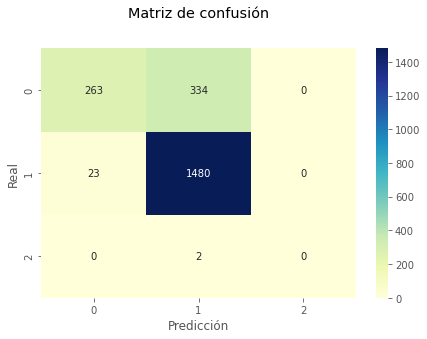

In [17]:
sns.heatmap(pd.DataFrame(matriz_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [18]:
precision_rfc = precision_score(y_test, rfc_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_rfc)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print('Exactitud del modelo:')
print(accuracy_rfc)

Precisión del modelo:
0.8292102759276879
Exactitud del modelo:
0.8292102759276879


In [19]:
clas_rfc = classification_report(y_test, rfc_y_pred, zero_division = 1)
print(clas_rfc)

              precision    recall  f1-score   support

           0       0.92      0.44      0.60       597
           1       0.81      0.98      0.89      1503
           2       1.00      0.00      0.00         2

    accuracy                           0.83      2102
   macro avg       0.91      0.48      0.50      2102
weighted avg       0.84      0.83      0.81      2102



In [20]:
gs_rfc.best_estimator_.feature_importances_

array([0.02309412, 0.0064975 , 0.02985617, 0.01139042, 0.00822621,
       0.01422588, 0.00516819, 0.01977873, 0.00325196, 0.0022449 ,
       0.01930564, 0.03538411, 0.01301534, 0.00971626, 0.02491513,
       0.01864828, 0.00187088, 0.00261317, 0.0112786 , 0.00990359,
       0.02055231, 0.01595412, 0.05282219, 0.05200429, 0.05252343,
       0.01601663, 0.00569798, 0.00827229, 0.00533243, 0.00689308,
       0.0084278 , 0.00402839, 0.00596325, 0.00416139, 0.00708334,
       0.00823774, 0.01187998, 0.02883423, 0.01613638, 0.02114773,
       0.02757629, 0.01581428, 0.00907953, 0.00378723, 0.00835717,
       0.01721035, 0.01614928, 0.02768747, 0.01130821, 0.00904868,
       0.02952867, 0.01390728, 0.02042918, 0.02150755, 0.00121608,
       0.00080288, 0.00333301, 0.0011812 , 0.00267848, 0.02185032,
       0.00167234, 0.00350585, 0.00131873, 0.00189911, 0.00616531,
       0.0227408 , 0.02879501, 0.02649191, 0.02260371])

Text(0.5, 0, 'Random Forest Feature Importance')

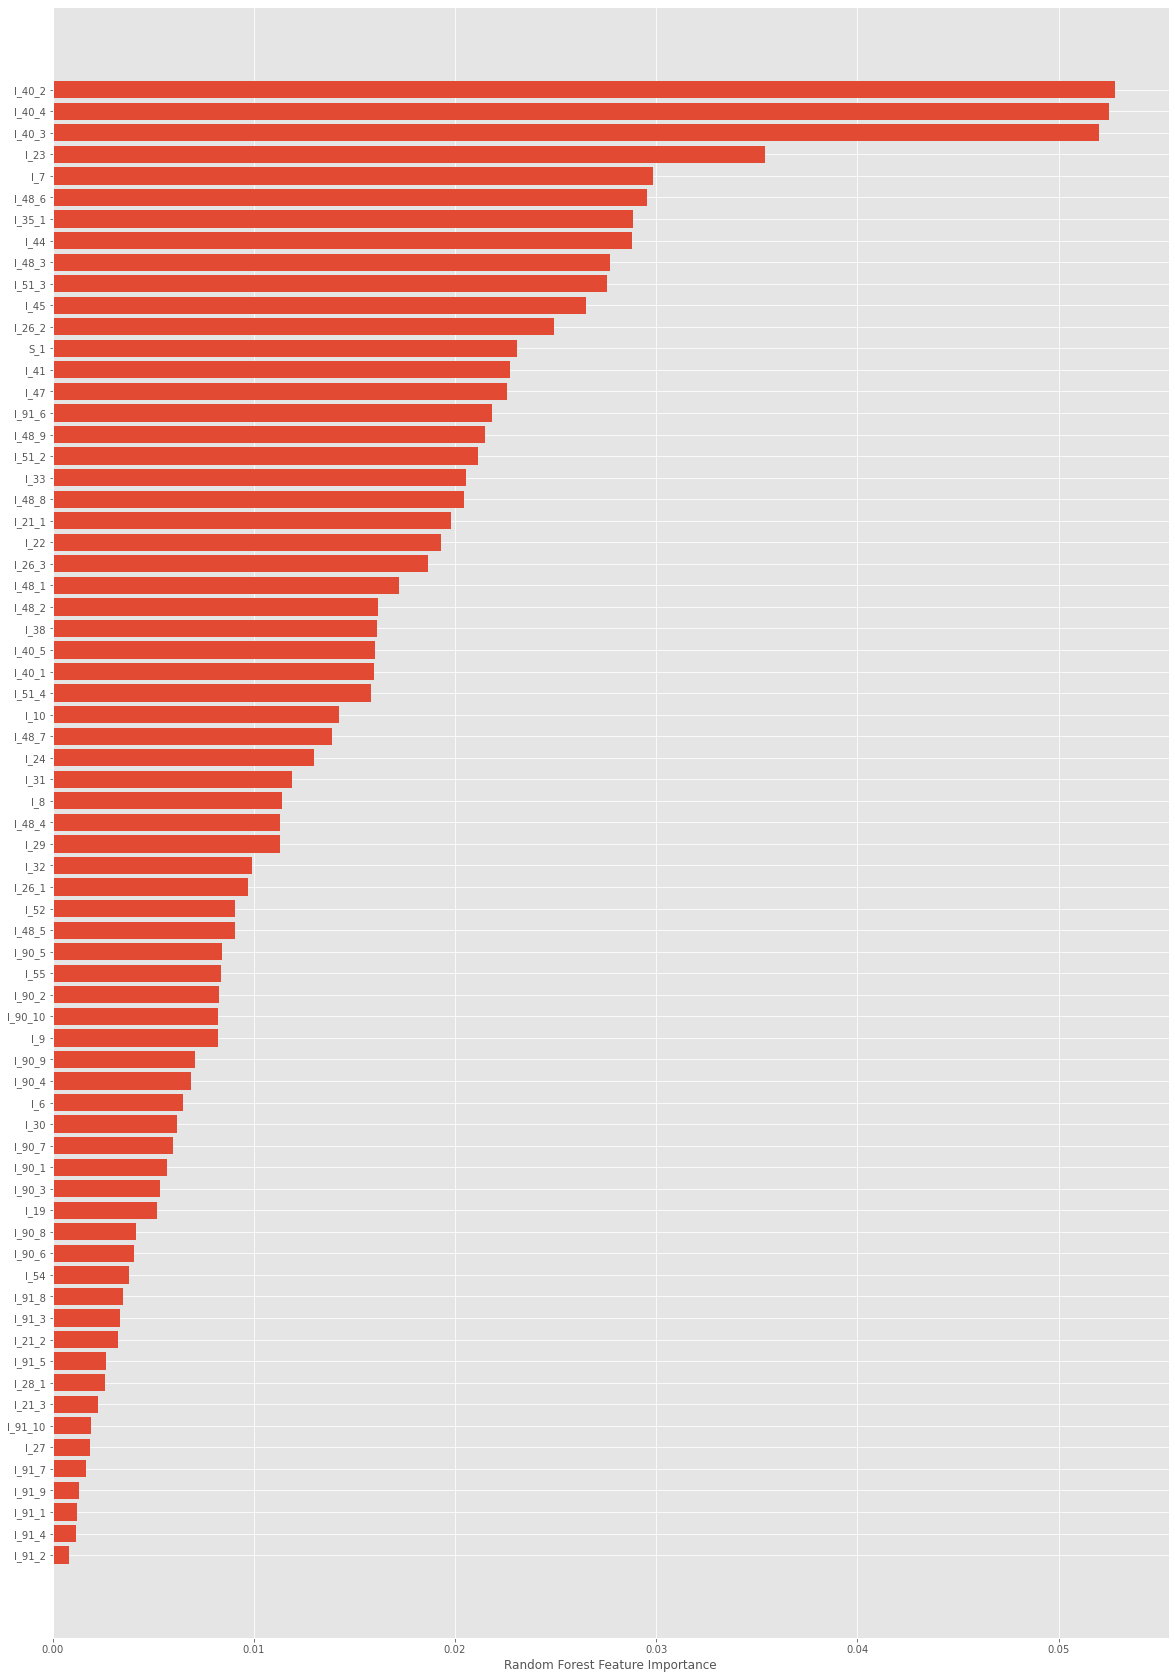

In [21]:
plt.rcParams["figure.figsize"] = (20, 30)
variables_importantes = gs_rfc.best_estimator_.feature_importances_.argsort()
plt.barh(feature_names[variables_importantes], gs_rfc.best_estimator_.feature_importances_[variables_importantes])
plt.xlabel("Random Forest Feature Importance")

In [22]:
perm_importance = permutation_importance(gs_rfc, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

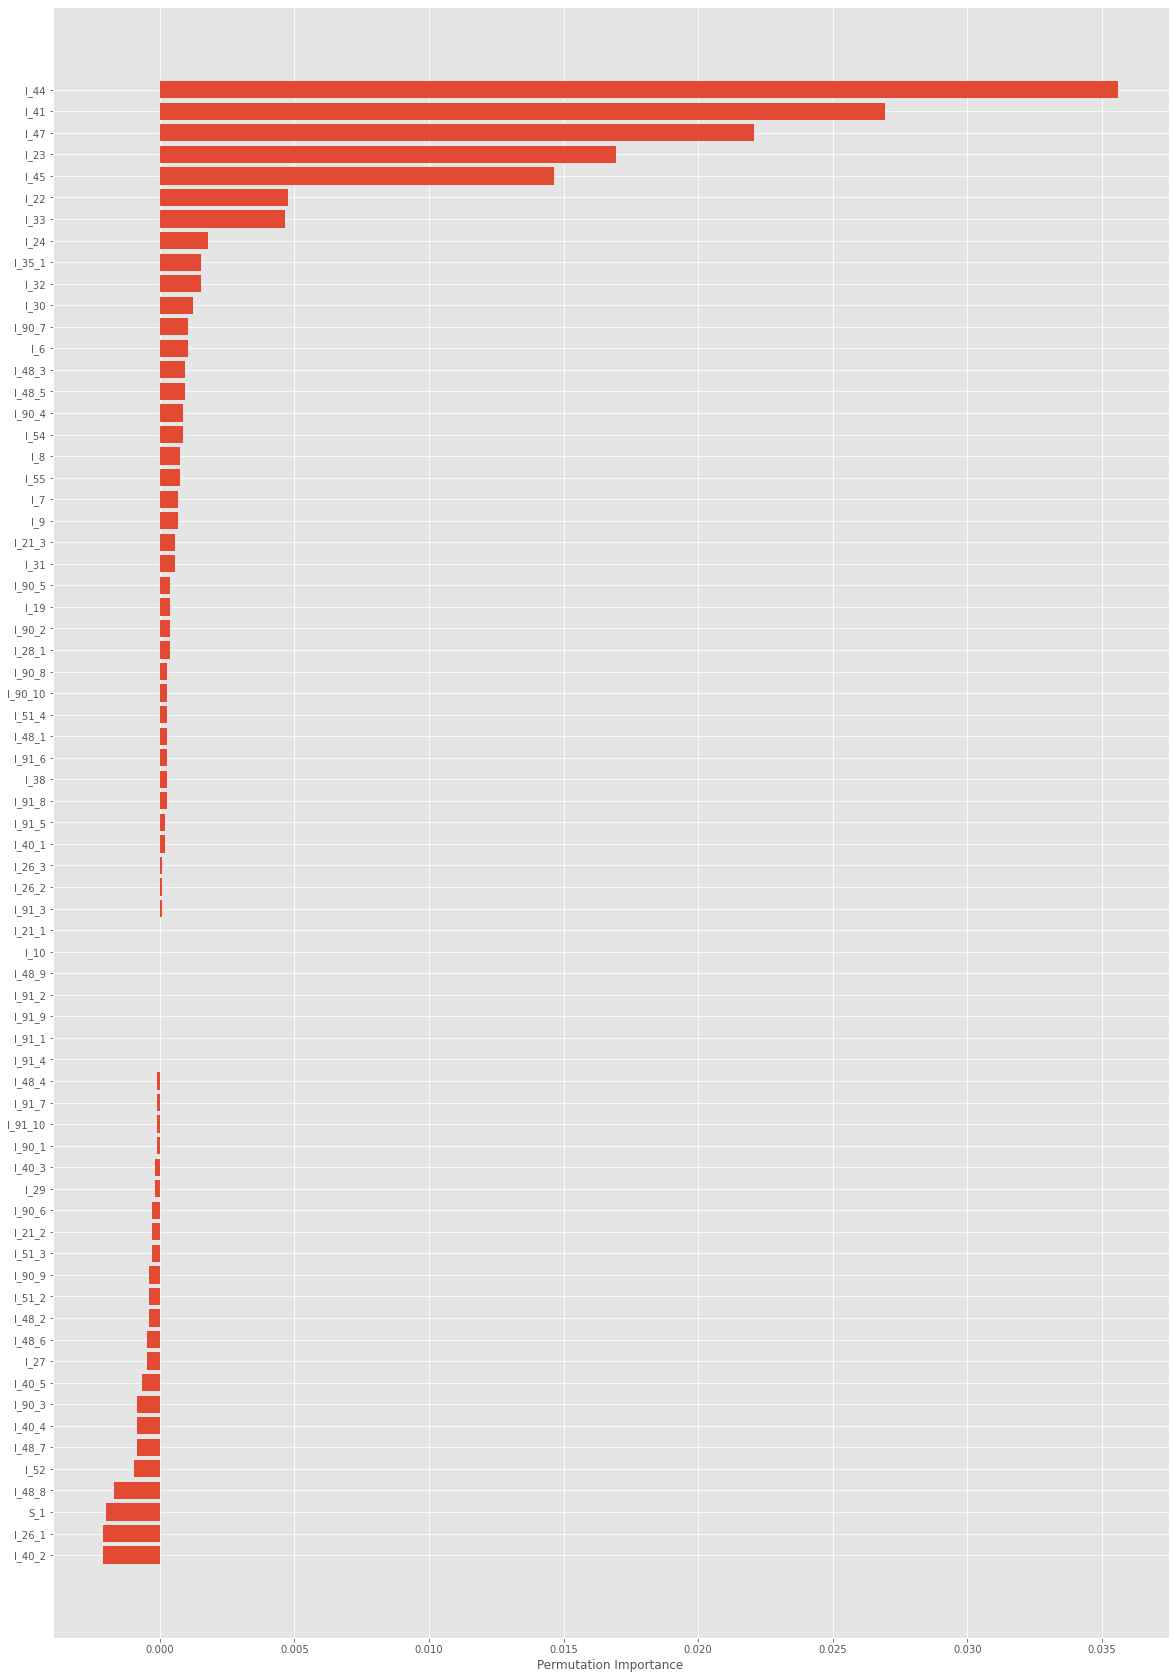

In [23]:
Variables_permutadas = perm_importance.importances_mean.argsort()
plt.barh(feature_names[Variables_permutadas], perm_importance.importances_mean[Variables_permutadas])
plt.xlabel("Permutation Importance")

In [24]:
explainer = shap.TreeExplainer(gs_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)

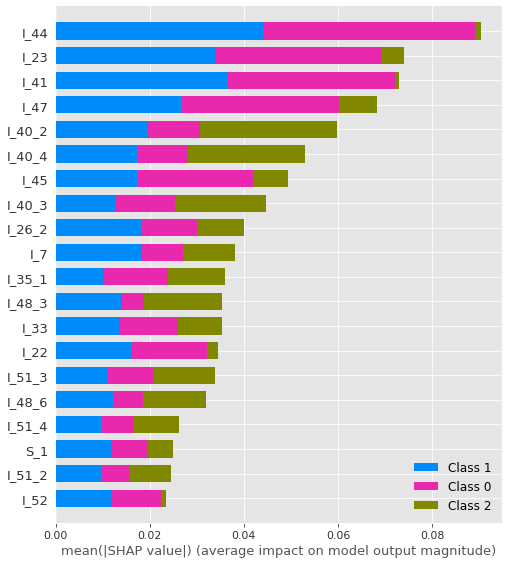

In [25]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

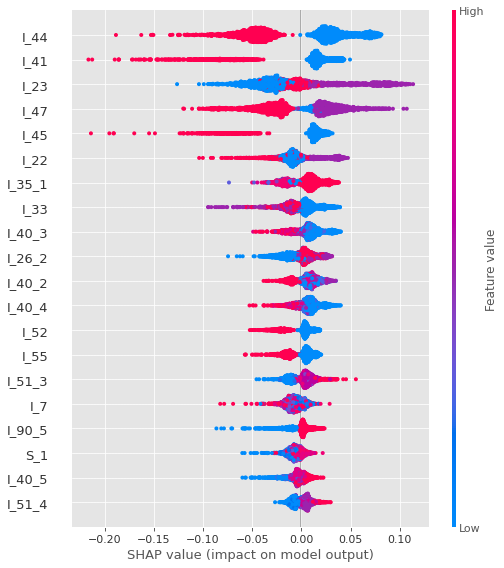

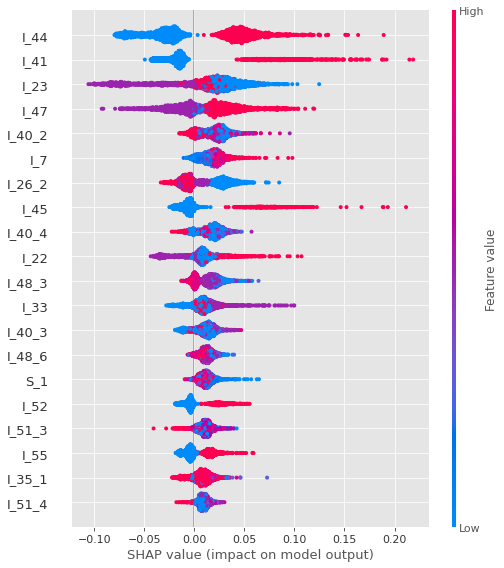

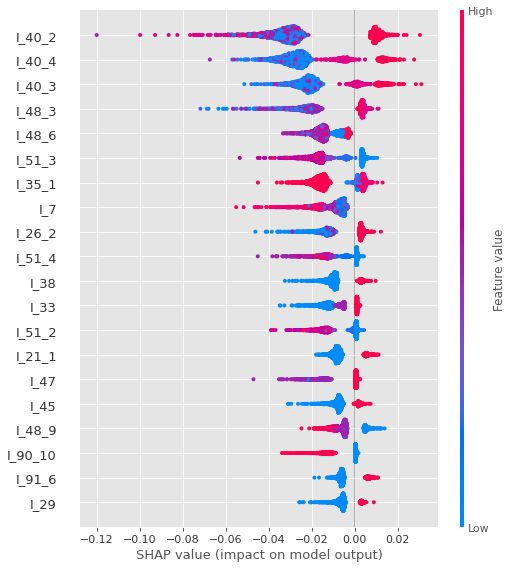

In [26]:
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values[2], X_test)

In [27]:
fig = px.histogram(Individuos,
                   x="I_44",
                   title='¿La participación o movilización ciudadana ha logrado algún impacto en términos' + '<br>' + 'de acciones o políticas adoptadas por la administración municipal?',
                   histnorm='percent',
                   labels={'I_44':'','percent':''})
fig.show()

In [28]:
caja0 = go.Box(
    y=Individuos[Individuos['I_44'] == "Si"]['IPCM'],
    x=Individuos[Individuos['I_44'] == "Si"]['I_44'],
    name='Si', boxpoints="all"
    )

caja1 = go.Box(
    y=Individuos[Individuos['I_44'] == "No"]['IPCM'],
    x=Individuos[Individuos['I_44'] == "No"]['I_44'],
    name='No', boxpoints="all"
    )
    
data = [caja0, caja1]

layout = go.Layout(
    yaxis=dict(
        title='IPCM',
        zeroline=False
    ),
    xaxis=dict(
        title='¿La participación o movilización ciudadana ha logrado algún impacto en términos' + '<br>' + 'de acciones o políticas adoptadas por la administración municipal?'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='I_44-Box')
# fig.show(renderer='colab')

In [28]:
caja0 = go.Box(
    y=Individuos[Individuos['I_47'] == "Mejorado"]['IPCM'],
    x=Individuos[Individuos['I_47'] == "Mejorado"]['I_47'],
    name='Mejorado', boxpoints="all"
    )

caja1 = go.Box(
    y=Individuos[Individuos['I_47'] == "Permanecido iguales"]['IPCM'],
    x=Individuos[Individuos['I_47'] == "Permanecido iguales"]['I_47'],
    name='Permanecido iguales', boxpoints="all"
    )

caja2 = go.Box(
    y=Individuos[Individuos['I_47'] == "Empeorado"]['IPCM'],
    x=Individuos[Individuos['I_47'] == "Empeorado"]['I_47'],
    name='Empeorado', boxpoints="all"
    )

data = [caja0, caja1, caja2]

layout = go.Layout(
    yaxis=dict(
        title='IPCM',
        zeroline=False
    ),
    xaxis=dict(
        title='Como resultado de las participación o movilizaciones ciudadana, considera que las condiciones de vida de su comunidad han:'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='I_47-Box')
# fig.show(renderer='colab')

In [29]:
caja0 = go.Box(
    y=Individuos[Individuos['I_40_4'] == 1]['IPCM'],
    x=Individuos[Individuos['I_40_4'] == 1]['I_40_4'],
    name='1 - Contribución nula', boxpoints="all"
    )

caja1 = go.Box(
    y=Individuos[Individuos['I_40_4'] == 2]['IPCM'],
    x=Individuos[Individuos['I_40_4'] == 2]['I_40_4'],
    name='2', boxpoints="all"
    )

caja2 = go.Box(
    y=Individuos[Individuos['I_40_4'] == 3]['IPCM'],
    x=Individuos[Individuos['I_40_4'] == 3]['I_40_4'],
    name='3', boxpoints="all"
    )

caja3 = go.Box(
    y=Individuos[Individuos['I_40_4'] == 4]['IPCM'],
    x=Individuos[Individuos['I_40_4'] == 4]['I_40_4'],
    name='4', boxpoints="all"
    )

caja4 = go.Box(
    y=Individuos[Individuos['I_40_4'] == 5]['IPCM'],
    x=Individuos[Individuos['I_40_4'] == 5]['I_40_4'],
    name='5 - Contribución muy alta', boxpoints="all"
    )

data = [caja0, caja1, caja2, caja3, caja4]

layout = go.Layout(
    yaxis=dict(
        title='IPCM',
        zeroline=False
    ),
    xaxis=dict(
        title='Califique el grado en el cual cada uno de los siguientes medios de comunicación contribuyen a motivar y promover la participación ciudadana: d. Televisión Comunitaria'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='I_40_4-Box')
# fig.show(renderer='colab')

In [30]:
caja0 = go.Box(
    y=Individuos[Individuos['I_41'] == "Si"]['IPCM'],
    x=Individuos[Individuos['I_41'] == "Si"]['I_41'],
    name='Si', boxpoints="all"
    )

caja1 = go.Box(
    y=Individuos[Individuos['I_41'] == "No"]['IPCM'],
    x=Individuos[Individuos['I_41'] == "No"]['I_41'],
    name='No', boxpoints="all"
    )
    
data = [caja0, caja1]

layout = go.Layout(
    yaxis=dict(
        title='IPCM',
        zeroline=False
    ),
    xaxis=dict(
        title='¿La participación o movilización ciudadana ha logrado algún impacto en términos de acciones o políticas adoptadas por la administración municipal?'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='I_41-Box')
# fig.show(renderer='colab')

In [31]:
caja0 = go.Box(
    y=Individuos[Individuos['I_23'] == "Si"]['IPCM'],
    x=Individuos[Individuos['I_23'] == "Si"]['I_23'],
    name='Si', boxpoints="all"
    )

caja1 = go.Box(
    y=Individuos[Individuos['I_23'] == "No"]['IPCM'],
    x=Individuos[Individuos['I_23'] == "No"]['I_23'],
    name='No', boxpoints="all"
    )
    
data = [caja0, caja1]

layout = go.Layout(
    yaxis=dict(
        title='IPCM',
        zeroline=False
    ),
    xaxis=dict(
        title='En caso de una reunión o evento relacionados con actividades comunitarias o ciudadanas, tiene acceso al préstamo de sedes comunales'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='I_41-Box')
# fig.show(renderer='colab')

In [ ]:
print(Individuos.groupby('I_40_4').size())

I_40_4
1    4126
2     726
3     857
4     758
5     537
dtype: int64


In [ ]:
caja0 = go.Box(
    y=Individuos[Individuos['I_44'] == "Si"]['IPCM'],
    x=Individuos[Individuos['I_44'] == "Si"]['S_1'],
    name='Si', boxpoints="all"
    )

caja1 = go.Box(
    y=Individuos[Individuos['I_44'] == "No"]['IPCM'],
    x=Individuos[Individuos['I_44'] == "No"]['S_1'],
    name='No', boxpoints="all"
    )
    
data = [caja0, caja1]

layout = go.Layout(
    yaxis=dict(
        title='IPCM',
        zeroline=False
    ),
    xaxis=dict(
        title='¿La participación o movilización ciudadana ha logrado algún impacto en terminos de acciones o políticas adoptadas por la administración municipal?'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

# py.iplot(fig, filename='I_44-Box')
fig.show(renderer='colab')

In [ ]:
linea0 = go.Scatter(
    x=Individuos['I_44'],
    y=Individuos['IPCM'],
    mode='markers',
    name='Gastos Totales')

caja0 = go.Box(
    y=Individuos[Individuos['I_44'] == "No"]['IPCM'],
    x=Individuos[Individuos['I_44'] == "No"]['S_1'],
    name='Sin Mora',
    )

caja1 = go.Box(
    y=Individuos[Individuos['I_44'] == "Si"]['IPCM'],
    x=Individuos[Individuos['I_44'] == "Si"]['S_1'],
    name='Con Mora',
    )

fig = plot.subplots.make_subplots(rows=2, cols=1, subplot_titles=('Mora Máxima por Gastos Totales','Mora Máxima por IPCM'))

fig.append_trace(linea0,1,1)
fig.append_trace(caja0,2,1)
fig.append_trace(caja1,2,1)

# py.iplot(fig, filename='Gastos-IPCM')
#fig.show(renderer='colab')
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
# O_2019 = Organizaciones[Organizaciones['Edicion'] == 2019]
# O_2017 = Organizaciones[Organizaciones['Edicion'] == 2017]

In [ ]:
Organizaciones = pd.read_csv('/content/BDOrganizacionesTotal.csv',decimal=',')
Organizaciones = Organizaciones[["S_1","O_88","O_89",
                 "O_12","O_13","O_21","O_22","O_67","O_68","O_8","O_19_1","O_19_2","O_19_3","O_19_4","O_19_5","O_19_6","O_19_7","O_19_8","O_19_9","O_19_10", 
                 "O_20_1","O_20_2","O_20_3","O_20_4","O_20_5","O_20_6","O_20_7","O_20_8","O_20_9","O_70_1","O_70_2","O_70_3","O_70_4","O_70_5","O_70_6",
                 "O_71_1","O_71_2","O_71_3","O_71_4","O_71_5","O_71_6",	"O_72_1","O_72_2","O_72_3","O_72_4","O_72_5","O_72_6","O_72_7","O_72_8","O_72_9",
                 "O_24","O_27","O_48","O_52","O_54","O_57","O_58","O_59","O_90","O_28_1","O_28_2","O_28_3","O_28_4","O_28_5","O_28_6","O_28_7","O_28_8","O_28_9",
                 "O_37_1","O_37_2","O_37_3","O_37_4","O_37_5","O_38_1","O_38_2","O_38_3","O_38_4","O_38_5","O_38_6","O_38_7","O_38_8","O_38_9",
                 "O_66_0","O_66_1","O_66_2","O_66_3","O_66_4","O_66_5","O_66_6","O_66_7","O_81_1","O_81_2","O_81_3","O_81_4","O_81_5","O_81_6","O_81_7",
                 "O_82_1","O_82_2","O_82_3","O_82_4","O_82_5","O_82_6","O_82_7",
                 "O_40","O_41","O_45","O_49","O_55","O_61_1","O_61_2","O_61_3","O_61_4","O_61_5","O_62_1","O_62_2","O_62_3","O_62_4","O_62_5","O_62_6",
          'IPCM']]
# Organizaciones = Organizaciones.fillna('NaN')
# Organizaciones = Organizaciones.reset_index(drop=True)
# Organizaciones.columns[Organizaciones.isnull().any()]
# Organizaciones['O_49'] = Organizaciones['O_49'].replace('-88', '9999', regex=True)
# Organizaciones['O_55'] = Organizaciones['O_55'].replace('-88', '9999', regex=True)
Organizaciones['O_49'] = Organizaciones['O_49'].replace(np.nan, 9999, regex=True)
Organizaciones['O_55'] = Organizaciones['O_55'].replace(np.nan, 9999, regex=True)
Organizaciones['O_20_8'] = Organizaciones['O_20_8'].replace(-88, 'Sin registro', regex=True)
Organizaciones['O_20_8'] = Organizaciones['O_20_8'].replace('0', 'Sin registro', regex=True)
Organizaciones['O_20_8'] = Organizaciones['O_20_8'].replace('2', 'Sin registro', regex=True)
Organizaciones['O_28_8'] = Organizaciones['O_28_8'].replace(-88, 'Sin registro', regex=True)
Organizaciones['O_89'] = Organizaciones['O_89'].replace('0', 'No', regex=True)
Organizaciones['O_89'] = Organizaciones['O_89'].replace('9999', 'No', regex=True)
Organizaciones['O_89'] = np.where((Organizaciones.O_89 != 'No'), 'Si', Organizaciones.O_89)
Organizaciones = Organizaciones.replace(np.nan, 'Sin registro', regex=True)
Organizaciones = Organizaciones.replace(-88, 9999, regex=True)
Organizaciones = Organizaciones.replace(-98, 9999, regex=True)
Organizaciones = Organizaciones.replace(-99, 9999, regex=True)
# Organizaciones = Organizaciones.replace(np.nan, 'NaN', regex=True)
# Organizaciones.to_excel('OrganizacionesIPCM.xlsx', index=False)
Organizaciones

,S_1,O_88,O_89,O_12,O_13,O_21,O_22,O_67,O_68,O_8,O_19_1,O_19_2,O_19_3,O_19_4,O_19_5,O_19_6,O_19_7,O_19_8,O_19_9,O_19_10,O_20_1,O_20_2,O_20_3,O_20_4,O_20_5,O_20_6,O_20_7,O_20_8,O_20_9,O_70_1,O_70_2,O_70_3,O_70_4,O_70_5,O_70_6,O_71_1,O_71_2,O_71_3,O_71_4,O_71_5,...,O_38_9,O_66_0,O_66_1,O_66_2,O_66_3,O_66_4,O_66_5,O_66_6,O_66_7,O_81_1,O_81_2,O_81_3,O_81_4,O_81_5,O_81_6,O_81_7,O_82_1,O_82_2,O_82_3,O_82_4,O_82_5,O_82_6,O_82_7,O_40,O_41,O_45,O_49,O_55,O_61_1,O_61_2,O_61_3,O_61_4,O_61_5,O_62_1,O_62_2,O_62_3,O_62_4,O_62_5,O_62_6,IPCM
0,1,Hombre,Si,Si,No,30,300,No consulta,No consulta,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,Si,Si,No,No,No,No,...,No,Si,No,No,No,No,No,No,No,Democráctico,Condescendiente,Inclusivo,Consultivo,Proactivo,Cooperativo,Delegativo,Democráctico,Condescendiente,Muy inclusivo,Consultivo,Proactivo,Cooperativo,Autosuficiente,"Si, bajo",Positiva,Mejorado,9999.0,9999.0,Equitativo,Equitativo,Equitativo,Equitativo,Equitativo,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.79
1,1,Mujer,No,Si,Si,90,50,No consulta,No consulta,Si,No,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,Si,No,No,No,No,No,...,No,Si,No,No,No,No,No,No,No,Autoritario,Manipulador,Excluyente,Dictatorial,Pasivo,Apático,Autosuficiente,Autoritario,Manipulador,Excluyente,Dictatorial,Pasivo,Apático,Autosuficiente,"Si, medio",Positiva,Permanecen igual,9999.0,9999.0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.75
2,1,Hombre,No,Si,Si,15,3000,Algunas veces,Casi siempre,Si,No,No,No,No,No,No,No,No,No,Si,No,No,Si,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Si,Si,No,...,Si,No,Si,Si,Si,Si,Si,Si,Si,Muy autoritario,Muy manipulador,Muy excluyente,Muy dictatorial,Muy pasivo,Muy apático,Muy autosuficiente,Muy democrático,Condescendiente,Muy inclusivo,Muy consultivo,Muy proactivo,Muy cooperativo,Muy delegativo,"Si, alto",Positiva,Empeorado,70.0,100.0,Totalmente inequitativo,Totalmente inequitativo,Totalmente inequitativo,Totalmente inequitativo,Totalmente inequitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,0.36
3,1,Mujer,No,Si,Si,12,30,No consulta,No consulta,Si,No,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,Si,No,No,No,No,No,...,No,Si,No,No,No,No,No,No,No,Autoritario,Manipulador,Excluyente,Dictatorial,Pasivo,Apático,Autosuficiente,Autoritario,Manipulador,Excluyente,Dictatorial,Pasivo,Apático,Autosuficiente,"Si, alto",Positiva,Permanecen igual,30.0,150.0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.65
4,1,Mujer,Si,Si,Si,30,12,Algunas veces,Algunas veces,Si,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,No,No,No,No,Si,No,Si,No,No,No,No,No,Si,No,No,No,...,No,No,Si,No,No,No,No,No,No,Autoritario,Manipulador,Excluyente,Dictatorial,Pasivo,Apático,Autosuficiente,Democráctico,Condescendiente,Inclusivo,Consultivo,Proactivo,Cooperativo,Autosuficiente,"Si, medio",Positiva,Permanecen igual,40.0,9999.0,Neutral,Neutral,Inequitativo,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,9,Mujer,Si,No,No,7,30,Casi siempre,Casi siempre,Si,No responde,No responde,No responde,No responde,No responde,No responde,No responde,No responde,No responde,Si,No responde,No responde,No responde,No responde,No responde,No responde,No responde,-88,Si,No,Si,No,No,Sin registro,Sin registro,No,Si,No,No,Sin registro,...,No,No,No,No,No,Si,No,No,No,Muy democrático,Muy condescendiente,Excluyente,Muy consultivo,Muy proactivo,Muy cooperativo,Delegativo,Autoritario,Manipulador,Excluyente,Muy dictatorial,Pasivo,Muy apátic

In [ ]:
Clase = []
for x in Organizaciones['IPCM']:
  if x >= 0.7:
    Clase.append(2)
  elif x >= 0.3:
    Clase.append(1)
  elif x >= 0:
    Clase.append(0)
  else:
    None

In [ ]:
Organizaciones.insert(121, "Clase", Clase, allow_duplicates=False)

In [ ]:
print(Organizaciones.groupby('Clase').size())

Clase
0      26
1    1319
2     369
dtype: int64


In [ ]:
X = np.array(Organizaciones.drop(['Clase','IPCM'],1))
Y = np.array(Organizaciones['Clase'])
feature_names = Organizaciones.drop([ 'Clase','IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
feature_names

array(['S_1', 'O_88', 'O_89', 'O_12', 'O_13', 'O_21', 'O_22', 'O_67',
       'O_68', 'O_8', 'O_19_1', 'O_19_2', 'O_19_3', 'O_19_4', 'O_19_5',
       'O_19_6', 'O_19_7', 'O_19_8', 'O_19_9', 'O_19_10', 'O_20_1',
       'O_20_2', 'O_20_3', 'O_20_4', 'O_20_5', 'O_20_6', 'O_20_7',
       'O_20_8', 'O_20_9', 'O_70_1', 'O_70_2', 'O_70_3', 'O_70_4',
       'O_70_5', 'O_70_6', 'O_71_1', 'O_71_2', 'O_71_3', 'O_71_4',
       'O_71_5', 'O_71_6', 'O_72_1', 'O_72_2', 'O_72_3', 'O_72_4',
       'O_72_5', 'O_72_6', 'O_72_7', 'O_72_8', 'O_72_9', 'O_24', 'O_27',
       'O_48', 'O_52', 'O_54', 'O_57', 'O_58', 'O_59', 'O_90', 'O_28_1',
       'O_28_2', 'O_28_3', 'O_28_4', 'O_28_5', 'O_28_6', 'O_28_7',
       'O_28_8', 'O_28_9', 'O_37_1', 'O_37_2', 'O_37_3', 'O_37_4',
       'O_37_5', 'O_38_1', 'O_38_2', 'O_38_3', 'O_38_4', 'O_38_5',
       'O_38_6', 'O_38_7', 'O_38_8', 'O_38_9', 'O_66_0', 'O_66_1',
       'O_66_2', 'O_66_3', 'O_66_4', 'O_66_5', 'O_66_6', 'O_66_7',
       'O_81_1', 'O_81_2', 'O_81_3', 'O_8

In [ ]:
ordinalEncoder = OrdinalEncoder(categories="auto",dtype=np.float64)

ordinalEncoder.fit(X)

X = ordinalEncoder.transform(X)

In [ ]:
X = pd.DataFrame(X, columns=feature_names)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=skf, n_jobs=-1, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
print("Mejores parámetros", gs_rfc.best_params_)
print("Mejor estimador", gs_rfc.best_estimator_)

Mejores parámetros {'max_features': 'auto', 'n_estimators': 100}
Mejor estimador RandomForestClassifier(class_weight='balanced')


In [ ]:
# rfc = RandomForestClassifier(class_weight='balanced', max_features='auto', n_estimators=700)
rfc_y_pred = gs_rfc.predict(X_test)

# rfc.fit(X_train,y_train)
#rfc_y_pred = rfc.predict(X_test)
rfc_y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
matriz_rfc = confusion_matrix(y_test, rfc_y_pred)
print('Matriz de Confusión:')
print(matriz_rfc)

Matriz de Confusión:
[[  0   8   0]
 [  2 390   5]
 [  0  23  87]]


Text(0.5, 24.0, 'Predicción')

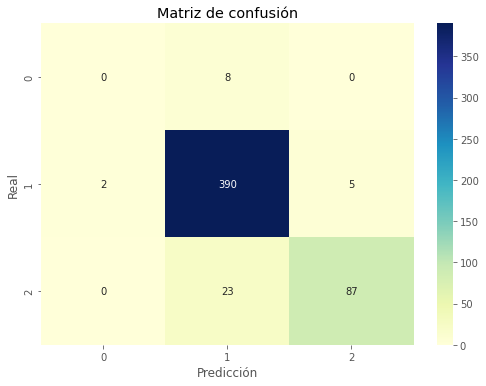

In [ ]:
plt.rcParams["figure.figsize"] = (7,5)
sns.heatmap(pd.DataFrame(matriz_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [ ]:
precision_rfc = precision_score(y_test, rfc_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_rfc)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print('Exactitud del modelo:')
print(accuracy_rfc)

Precisión del modelo:
0.9262135922330097
Exactitud del modelo:
0.9262135922330097


In [ ]:
clas_rfc = classification_report(y_test, rfc_y_pred, zero_division = 1)
print(clas_rfc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.93      0.98      0.95       397
           2       0.95      0.79      0.86       110

    accuracy                           0.93       515
   macro avg       0.62      0.59      0.60       515
weighted avg       0.92      0.93      0.92       515



In [ ]:
gs_rfc.best_estimator_.feature_importances_

array([0.01275093, 0.00521053, 0.00420829, 0.00360365, 0.00264067,
       0.01705656, 0.02477982, 0.01518908, 0.02409321, 0.00391254,
       0.00362621, 0.01725539, 0.00548499, 0.00117611, 0.00482259,
       0.0071204 , 0.01719632, 0.01481999, 0.00433776, 0.001703  ,
       0.00251376, 0.01166429, 0.00897539, 0.00325327, 0.00326043,
       0.00565534, 0.00742215, 0.01933321, 0.00554364, 0.00330326,
       0.00534378, 0.00109803, 0.00726734, 0.02049885, 0.01362228,
       0.00543302, 0.00242629, 0.00245224, 0.00160589, 0.00996362,
       0.02338676, 0.00212423, 0.00215304, 0.00125848, 0.00177234,
       0.00440158, 0.0087473 , 0.00532884, 0.00964749, 0.01765061,
       0.02454399, 0.01349242, 0.01617704, 0.01876696, 0.03162343,
       0.01242127, 0.01174136, 0.01115388, 0.01685841, 0.0092071 ,
       0.0063207 , 0.0063761 , 0.00274199, 0.00200866, 0.00669614,
       0.00469675, 0.02443721, 0.02270117, 0.00141771, 0.00286775,
       0.00083204, 0.00091899, 0.00274044, 0.00208814, 0.00171

Text(0.5, 0, 'Random Forest Feature Importance')

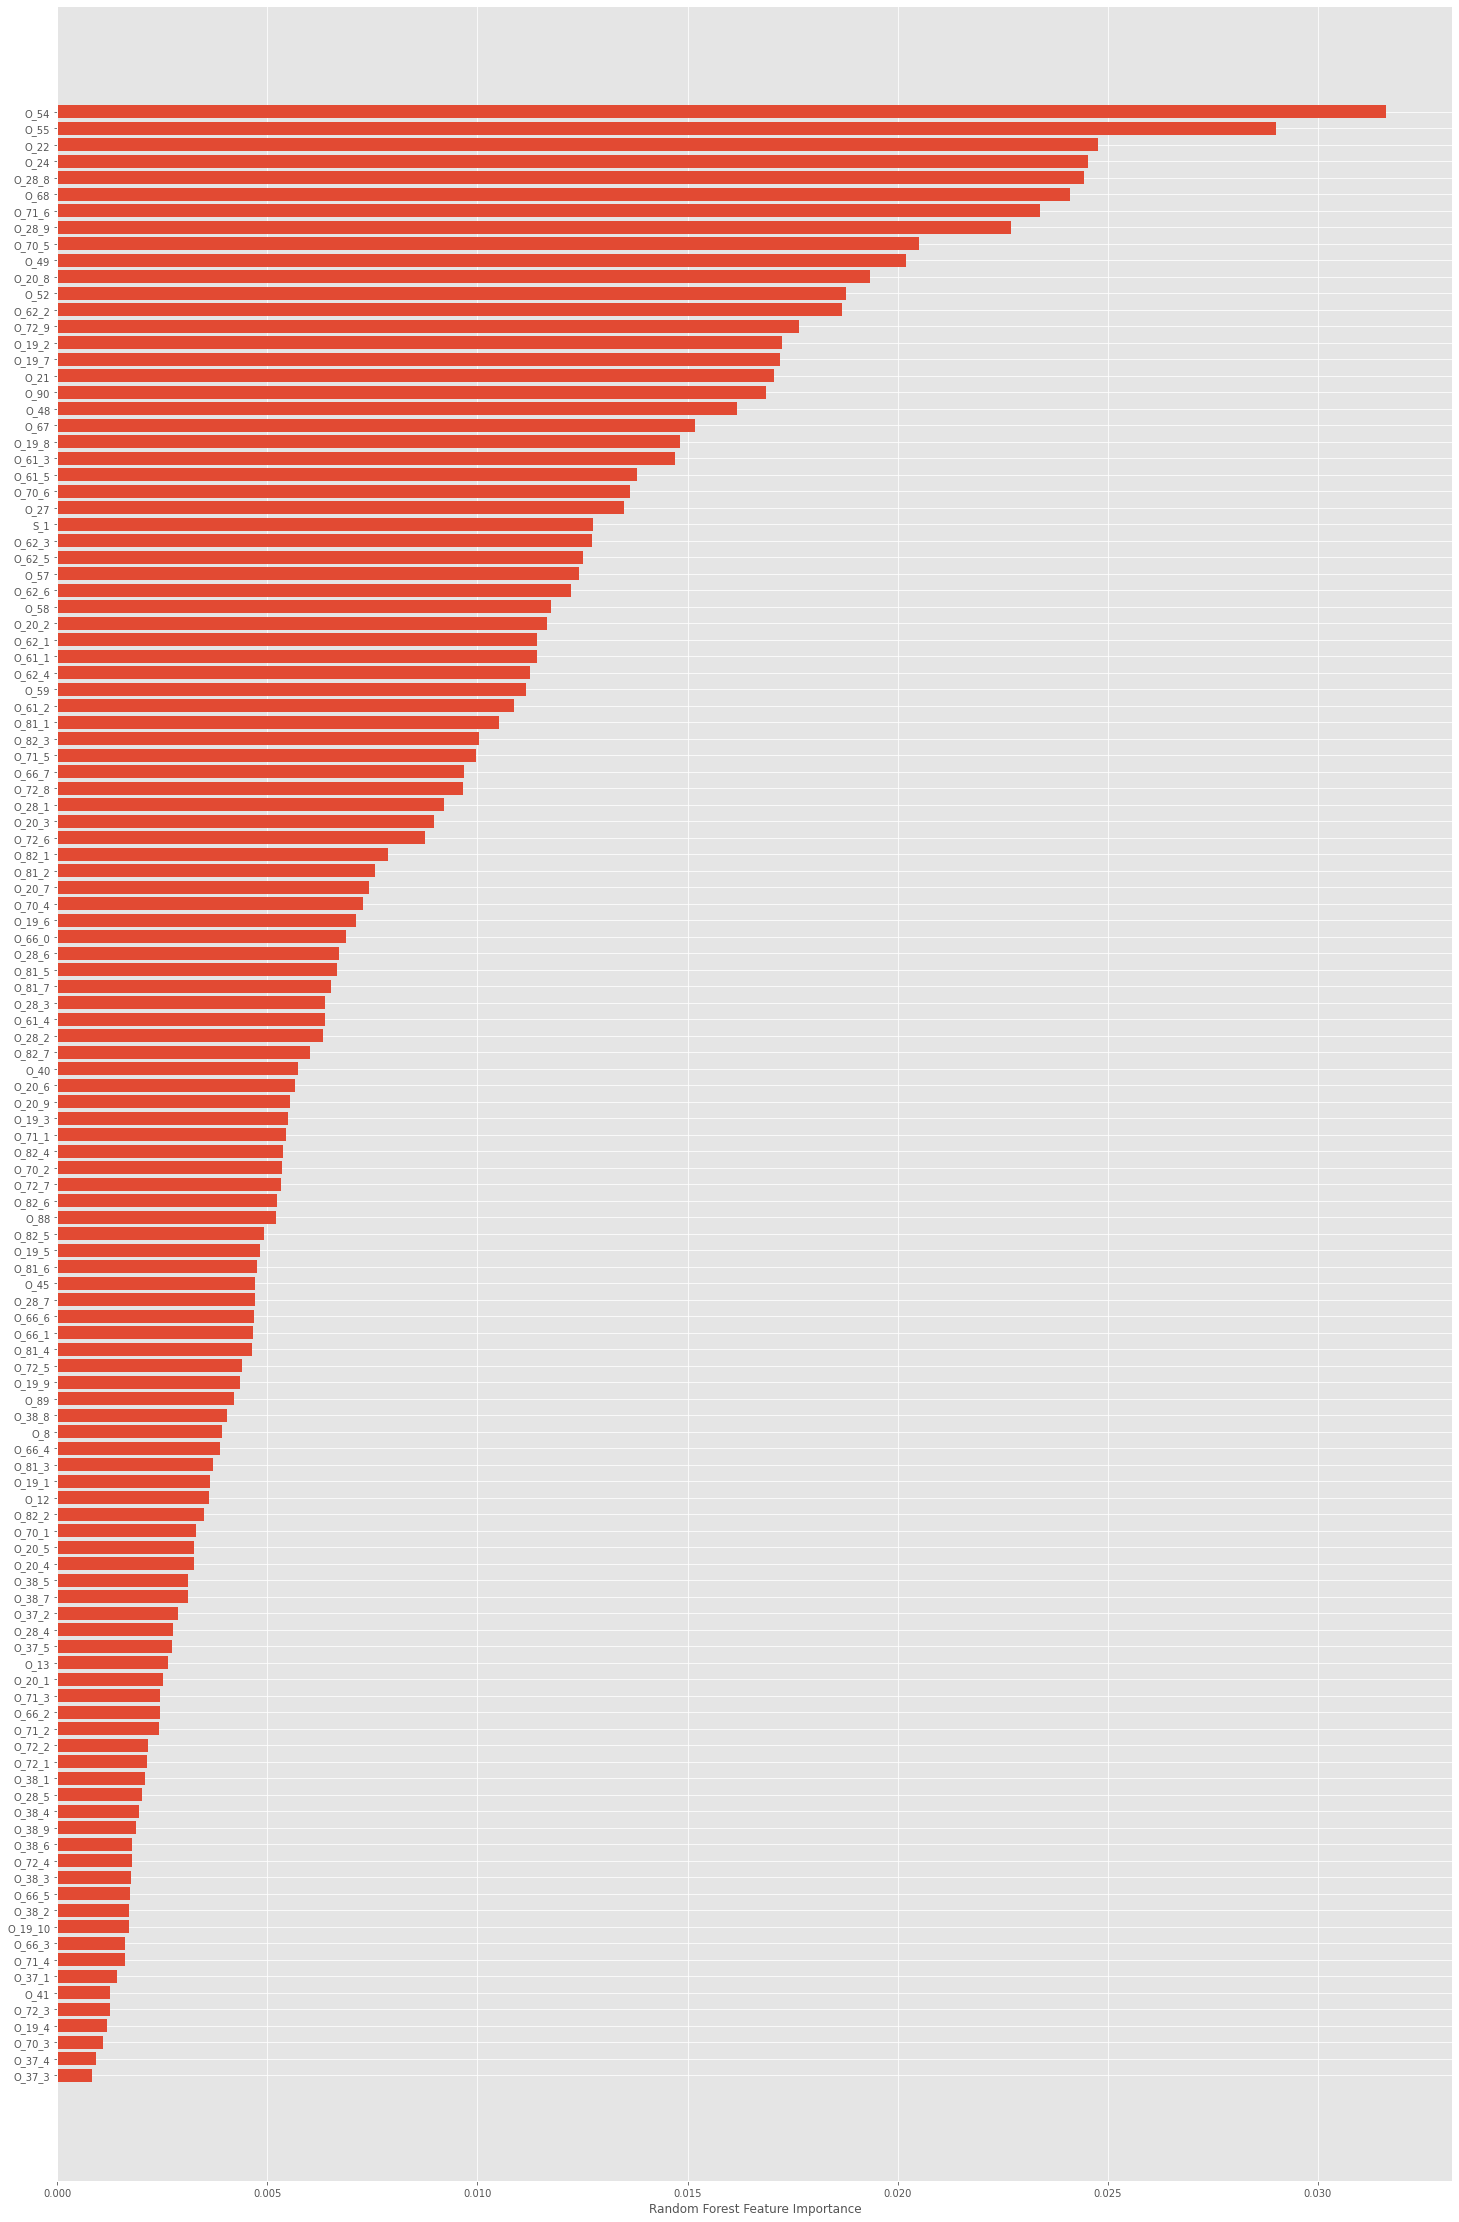

In [ ]:
plt.rcParams["figure.figsize"] = (25, 40)
variables_importantes = gs_rfc.best_estimator_.feature_importances_.argsort()
plt.barh(feature_names[variables_importantes], gs_rfc.best_estimator_.feature_importances_[variables_importantes])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
perm_importance = permutation_importance(gs_rfc, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

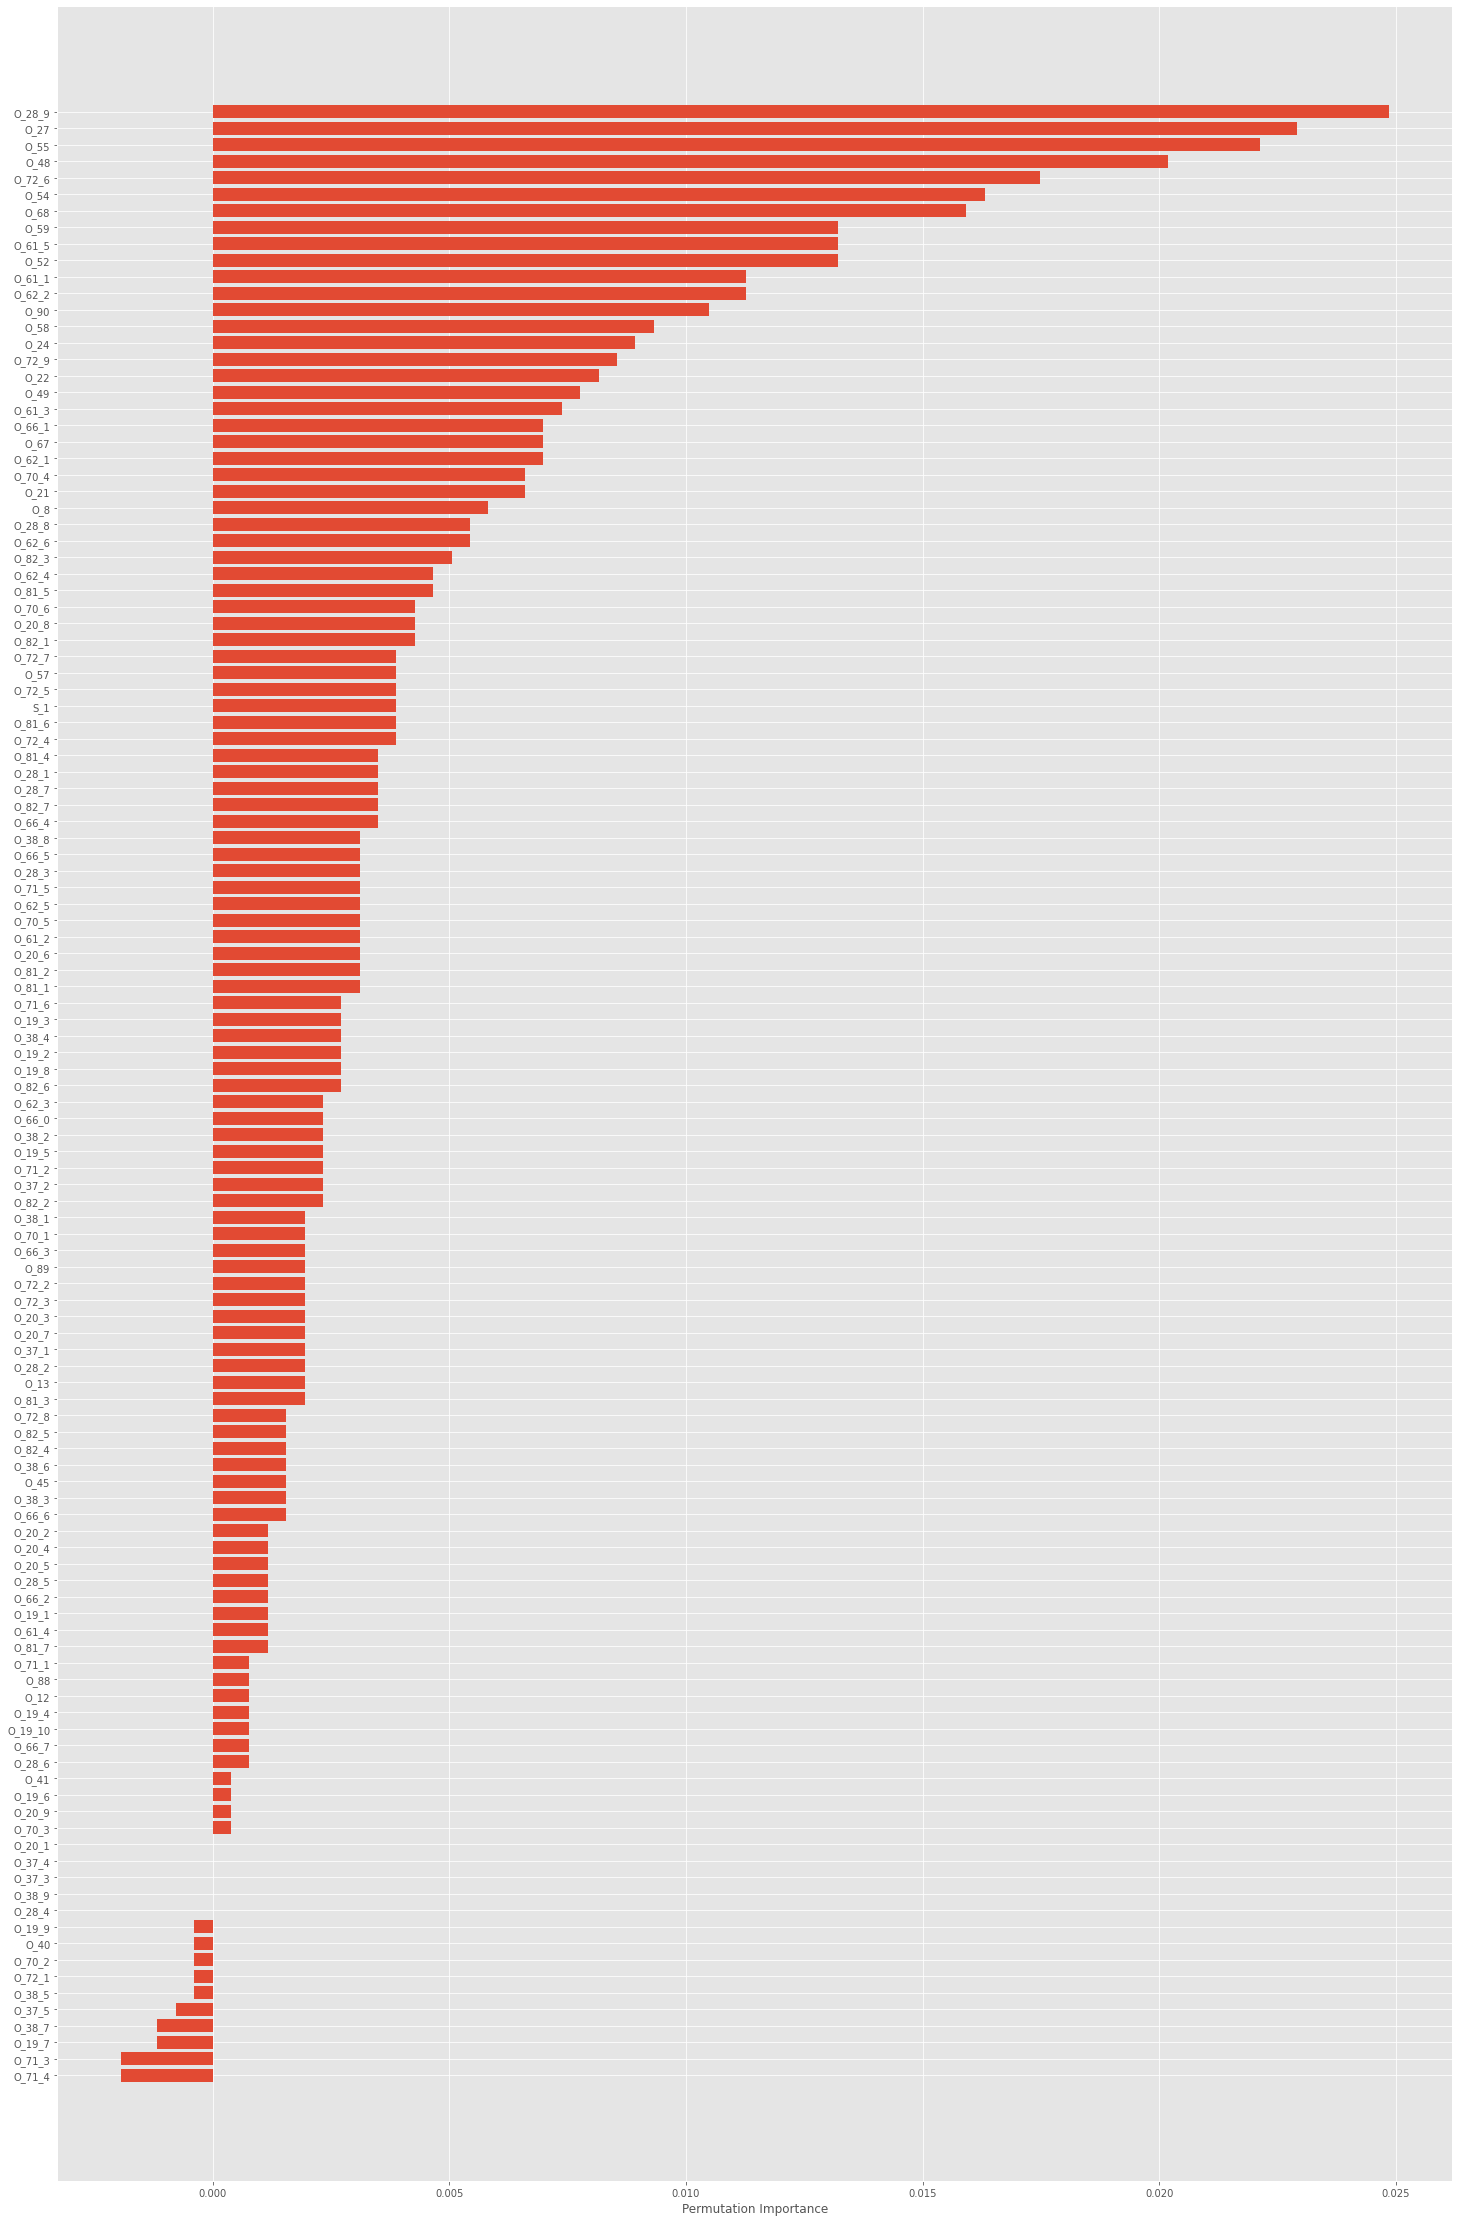

In [ ]:
Variables_permutadas = perm_importance.importances_mean.argsort()
plt.barh(feature_names[Variables_permutadas], perm_importance.importances_mean[Variables_permutadas])
plt.xlabel("Permutation Importance")

In [ ]:
explainer = shap.TreeExplainer(gs_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)

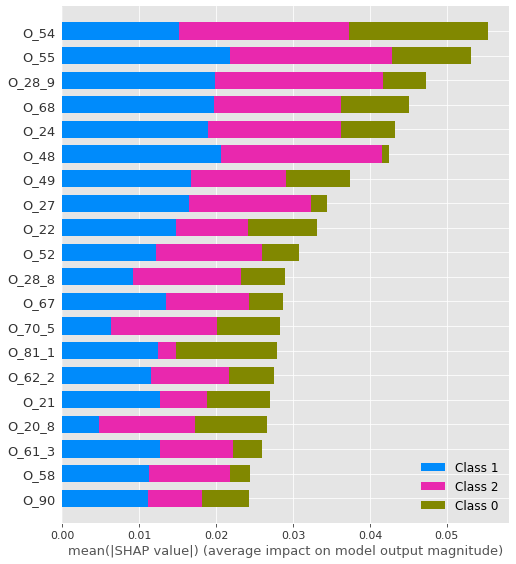

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

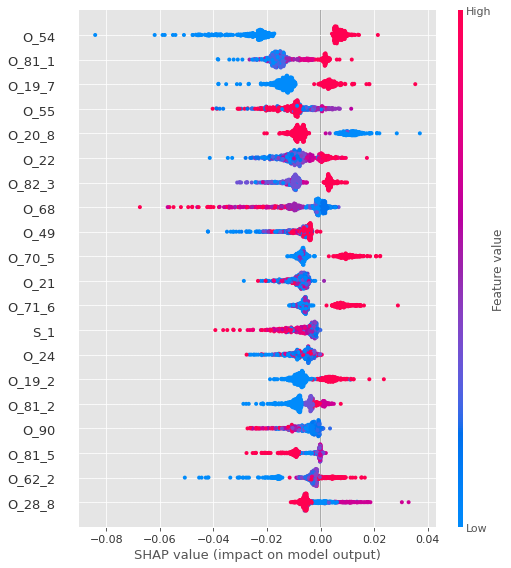

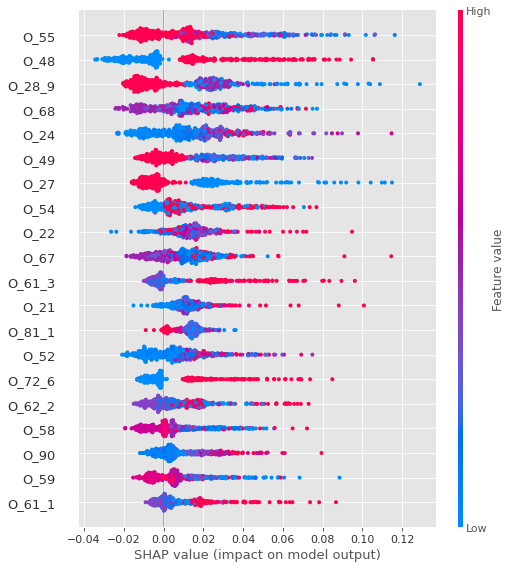

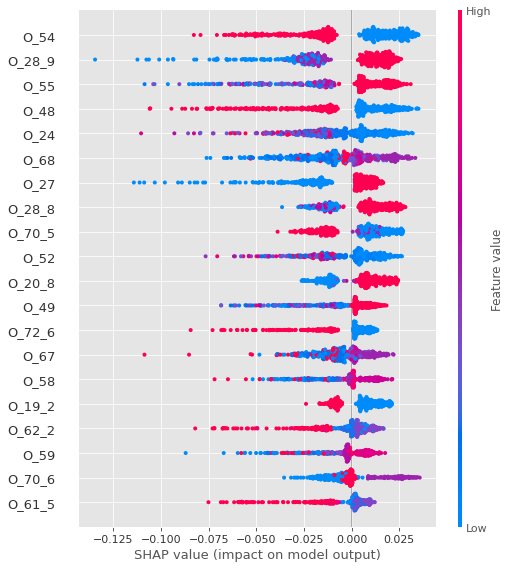

In [ ]:
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values[2], X_test)